In [27]:
from scipy.integrate import odeint
from scipy import arange
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [28]:
### Van der Pol attractor Model Class
class vanDerPol:
    ## Must be in same order as dXdt return
    label = ['x', 'z']
    nVar = len(label)

    ## Parameters
    p = {
    'mu': 0.2
    }

    ## Get initial values for the system
    def __init__(self, X0 = [0.1, 1.0]):
        self.name = self.__class__.__name__
        if self.nVar != len(X0):
            print 'ERROR:', self.nVar, 'initial values required for:', self.name
        else: 
            self.X0 = X0

    ## Define the dX/dt for the system
    def dXdt(self, X, t):
        x, z = X

        dxdt = z
        dzdt = -self.p['mu'] * (x**2.0 - 1.0) * z - x

        return dxdt, dzdt

In [29]:
## Time interval of the simulations
t = arange(0.0, 50.0, 0.01)
m = vanDerPol()

## Solving the diffential equations
sol = odeint(m.dXdt, m.X0, t)

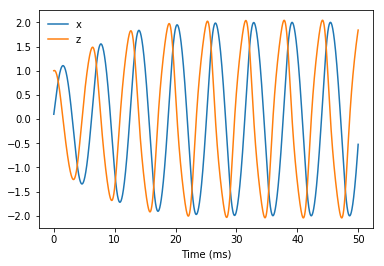

In [30]:
## Plot solution timeseries
fig, ax = plt.subplots()
for i, v in enumerate(m.label):
    figY = plt.plot(t, sol[:,i], label=v)

plt.xlabel('Time (ms)')
plt.legend(frameon=False)
plt.show()

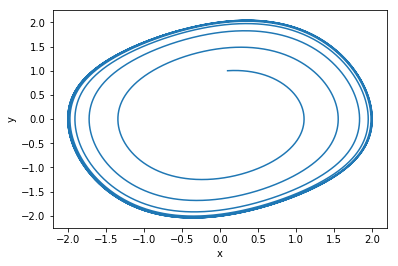

In [31]:
## Phase portrait
fig, ax = plt.subplots()

x, z = sol.T
plt.plot(x, z)

plt.xlabel('x')
plt.ylabel('y')
plt.show()